In [245]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
plt.style.use('ggplot')
import math

In [246]:
# unemployment rate in the US from the year of 1948 to 2017

In [247]:
df = pd.read_excel('USA umemployment rate 1948-2017.xlsx')

In [248]:
df.head()

,Year,Period,Value
0,1948,M01,3.4
1,1948,M02,3.8
2,1948,M03,4.0
3,1948,M04,3.9
4,1948,M05,3.5


In [249]:
# change the name 'value' to 'unemployment rate'.
df = df.rename(columns={'Value':'Unemployment Rate'})

In [250]:
df.head()

,Year,Period,Unemployment Rate
0,1948,M01,3.4
1,1948,M02,3.8
2,1948,M03,4.0
3,1948,M04,3.9
4,1948,M05,3.5


In [251]:
# create a new table for each year and its average unemployment rate

In [252]:
# 1, easy way
date=df.set_index('Year').groupby('Year').mean()
date.head()

,Unemployment Rate
Year,
1948,3.750000
1949,6.050000
1950,5.208333
1951,3.283333
1952,3.025000


In [253]:
# 2, fun way
data = pd.DataFrame(df['Year'].unique(), columns=['Year'])
data.head()

,Year
0,1948
1,1949
2,1950
3,1951
4,1952


In [254]:
# find the avg unemployment rate for every year. sum the rate of every 12 months and find its mean
sum=0
avg=[]
n=0
for x in range(len(data)):
    for y in range(n,len(df)):
        if(df['Year'][y] == data['Year'][x]):
            sum += df['Unemployment Rate'][y]
        else:
            avg.append(sum/12)
            n=y
            sum=0
            break
        if(y == 839): # y will never reach 840, so without this condition, the else condition above will not be activate
            avg.append((sum/12))

In [255]:
avg[0:5]

[3.75, 6.05, 5.208333333333333, 3.2833333333333337, 3.0250000000000004]

In [256]:
# combine the data
data['Unemployment Rate'] = pd.DataFrame(avg, columns=['Unemployment Rate'])

# round the rate to 2 decimal place
data['Unemployment Rate'] = data['Unemployment Rate'].round(2)

In [257]:
data.head()

,Year,Unemployment Rate
0,1948,3.75
1,1949,6.05
2,1950,5.21
3,1951,3.28
4,1952,3.03


In [258]:
# graph the data

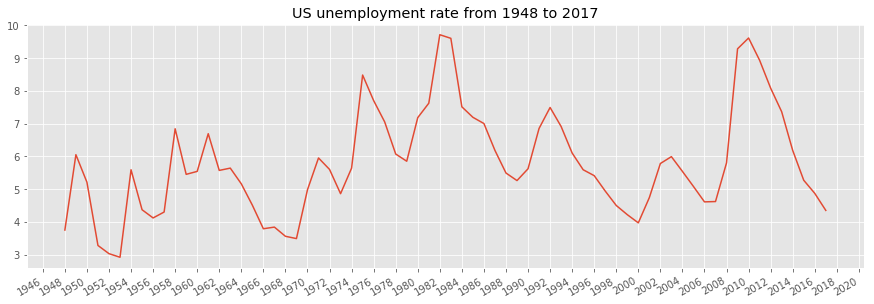

In [259]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(data['Year'], data['Unemployment Rate'])

# show the year with more detail
ax.locator_params(nbins=70, axis='x')

# italic the values in the x axis
fig.autofmt_xdate()

plt.title('US unemployment rate from 1948 to 2017')
plt.show()

In [260]:
# recessions in the 1980s and around 2009

In [261]:
# we need to log transform the ‘y’ variable to a try to convert non-stationary data to stationary. 
# This also converts trends to more linear trends 

data['Unemployment Rate'] = np.log(data['Unemployment Rate'])
data.head()

,Year,Unemployment Rate
0,1948,1.321756
1,1949,1.800058
2,1950,1.650580
3,1951,1.187843
4,1952,1.108563


In [262]:
data_set = data['Unemployment Rate'].values

In [263]:
len(data_set)

70

In [264]:
# There are 70 years data, and I will use every 30 years to predict the unemploment rate in the 31th year.

In [265]:
training_set = data_set[:50]

In [266]:
# prepare the training data, use every 30 data to predict the 31th. 0-29 -> 30, and 1-30 -> 31, ...
X_train = []
y_train = []
for i in range(30, len(training_set)):
    X_train.append(training_set[i-30:i])
    y_train.append(training_set[i])

In [267]:
# prepare the test set. Here will use the last 30 values in the training set to predic the first value in the test set
test_set = data_set[20:] # last 50 values
X_test = []
y_test = data_set[50:]
for i in range(30, 50):
    X_test.append(training_set[i-30:i]) # the first value here is the 20th value in data_set


In [268]:
from sklearn.linear_model import LinearRegression

In [269]:
lrm = LinearRegression()

In [270]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [271]:
pred_lrm = lrm.predict(X_test)

In [272]:
# reverse the values from log
for i in range(20):
    y_test[i] = math.exp(y_test[i])
    pred_lrm[i] = math.exp(pred_lrm[i])

In [273]:
# last 20 years
L20y = data['Year'][50:]

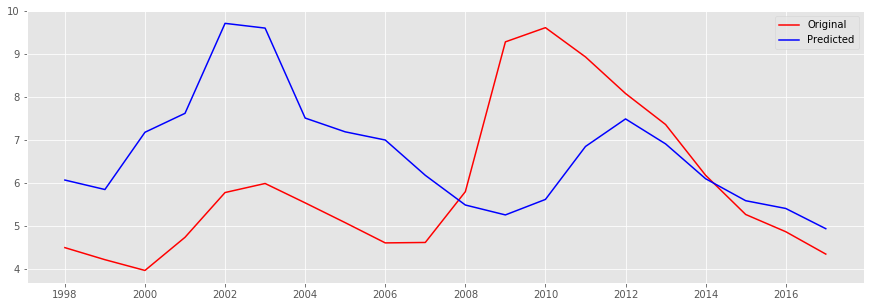

In [274]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='red')
two, = ax.plot(L20y, pred_lrm, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

# looks like the trend is shifted. Expecially the time during the recession

In [275]:
from sklearn.neighbors import KNeighborsRegressor

In [276]:
knn = KNeighborsRegressor(n_neighbors=2)

In [277]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [278]:
pred_knn = knn.predict(X_test)

In [279]:
for i in range(20):
    pred_knn[i] = math.exp(pred_knn[i])

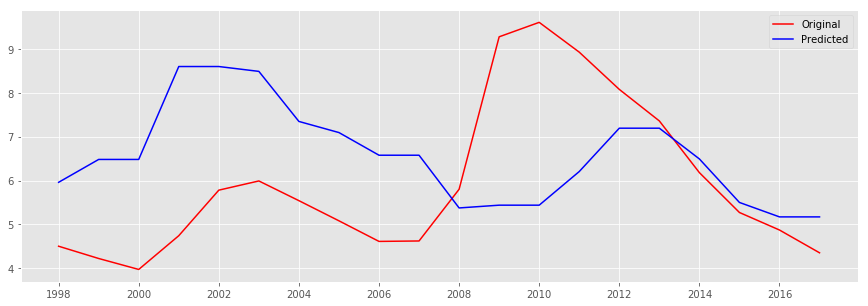

In [280]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='red')
two, = ax.plot(L20y, pred_knn, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

In [281]:
from sklearn.tree import DecisionTreeRegressor

In [282]:
tree = DecisionTreeRegressor()

In [283]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [284]:
pred_tree = tree.predict(X_test)

In [285]:
for i in range(20):
    pred_tree[i] = math.exp(pred_tree[i])

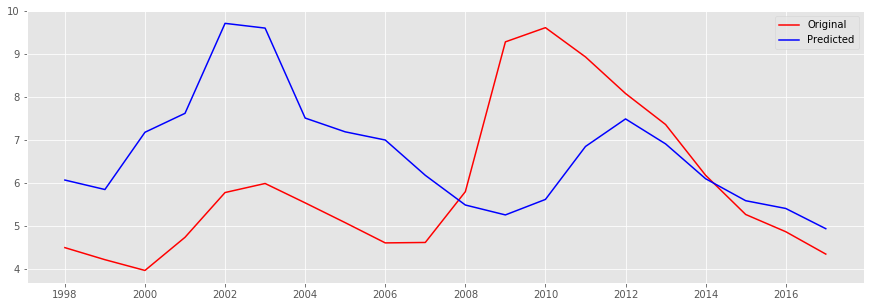

In [286]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='red')
two, = ax.plot(L20y, pred_tree, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

In [287]:
from sklearn.ensemble import RandomForestRegressor

In [288]:
rfr = RandomForestRegressor(n_jobs=100)

In [289]:
rfr.fit(X_train, y_train)

C:\Users\Abhi kamboj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=100,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [290]:
pred_rfr = rfr.predict(X_test)

In [291]:
for i in range(20):
    pred_rfr[i] = math.exp(pred_rfr[i])

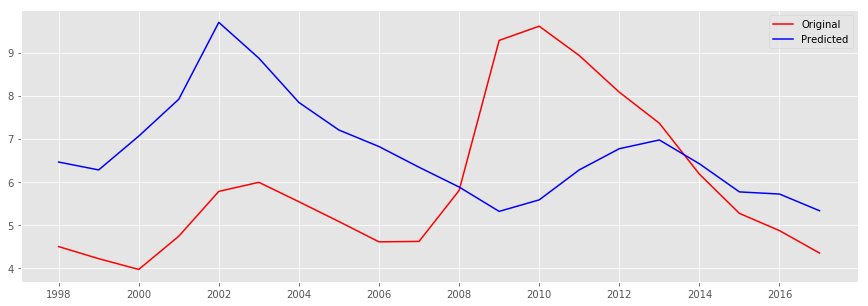

In [292]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='red')
two, = ax.plot(L20y, pred_rfr, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

In [293]:
from sklearn.svm import SVR

In [294]:
svr = SVR()

In [295]:
svr.fit(X_train, y_train)

C:\Users\Abhi kamboj\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [296]:
pred_svr = svr.predict(X_test)

In [297]:
for i in range(20):
    pred_svr[i] = math.exp(pred_svr[i])

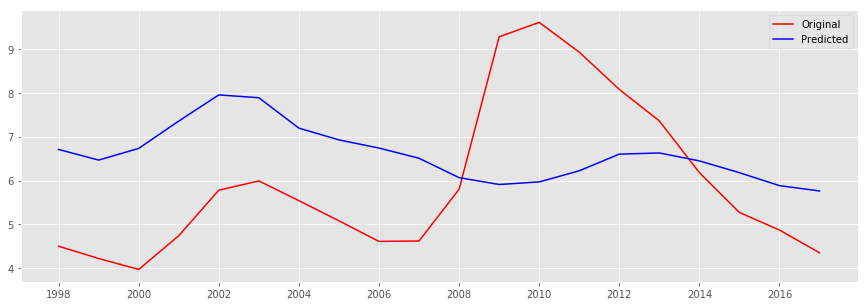

In [298]:
fig,ax = plt.subplots(figsize=(15,5))
one, = ax.plot(L20y, y_test, color='red')
two, = ax.plot(L20y, pred_svr, color='blue')
plt.legend([one,two],['Original','Predicted'])
ax.locator_params(nbins=20, axis='x')

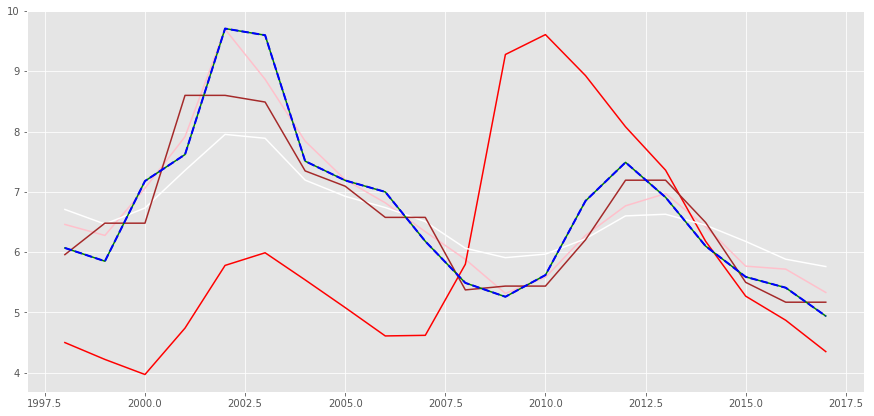

In [299]:
fig,ax = plt.subplots(figsize=(15,7))

ax.plot(L20y, pred_rfr, color='pink')

ax.plot(L20y, y_test, color='red')

ax.plot(L20y, pred_svr, color='white')

ax.plot(L20y, pred_knn, color='brown')

ax.plot(L20y, pred_tree, color='green')  

ax.plot(L20y, pred_lrm, color='blue',lw=2, ls='--')

